In [273]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

pd.__version__
%matplotlib inline


In [274]:
df = pd.read_csv('AB.csv', na_values='?')
df.dropna(inplace=True)
df2 = pd.read_csv('AB.csv', na_values='?')
df2.dropna(inplace=True)

In [275]:
def change_status(Satus):
    if Satus == 'Operating':
        return 1;
    else :
        return 0;

In [276]:
def change_category(Categories):
    if Categories == 'Technology':
        return 0;
    elif Categories == 'Service_Ind':
        return 1;
    elif Categories == 'E-Commerce':
        return 2;
    elif Categories == 'Curated_Web':
        return 3;
    elif Categories == 'Advertising':
        return 4;
    elif Categories == 'Education':
        return 5;
    elif Categories == 'Finance':
        return 6;
    elif Categories == 'Fashion':
        return 7;
    elif Categories == 'Medical':
        return 8;

In [277]:
def change_funding(Amounts_raised_in_different_funding_rounds):
    if Amounts_raised_in_different_funding_rounds < 1:
        return 'zero'
    elif Amounts_raised_in_different_funding_rounds >1 :
        return Amounts_raised_in_different_funding_rounds;
#    elif Amounts_raised_in_different_funding_rounds < 100000 :
#        return 'Extremely_Low'
#    elif Amounts_raised_in_different_funding_rounds < 500000 :
#        return 'Low'
#    elif Amounts_raised_in_different_funding_rounds < 1000000 :
#        return 'medium'
#    elif Amounts_raised_in_different_funding_rounds < 5000000 :
 #       return 'High'
#    else:
#        return 'Extremely_High'

In [278]:
df['Satus'] = df['Satus'].apply(change_status)
df2['Satus'] = df2['Satus'].apply(change_status)
df2['Amounts_raised_in_different_funding_rounds'] = df['Amounts_raised_in_different_funding_rounds'].apply(change_funding)
#df['YCombinatorYear'] = df['YCombinatorYear'].apply(change_year)
#df['Categories'] = df['Categories'].apply(change_category)
df3 = df[df2.Amounts_raised_in_different_funding_rounds != 'zero' ]
df3

,Company,Satus,Amounts_raised_in_different_funding_rounds,Categories,YCombinatorYear,HeadquartersCity
0,Curebit,1,1200000,E-Commerce,2011,San Francisco
1,Goldbely,1,3000000,E-Commerce,2013,San Francisco
2,theDailyMuse,1,7300000,Service_Ind,2012,New York City
3,Zencoder,0,2000000,Technology,2010,San Francisco
4,GinzaMetrics,1,1714000,Finance,2010,San Francisco
6,Bloomthat,1,2400000,Service_Ind,2013,San Francisco
7,PIxate,1,3800000,Service_Ind,2012,Palo Alto
8,Movity,0,1300000,Curated_Web,2010,San Francisco
9,Etacts,0,740000,Curated_Web,2010,Palo Alto
10,Asseta,1,535000,Finance,2013,San Francisco


In [279]:
#df_pclass = df[['Amounts_raised_in_different_funding_rounds', 'Satus']].groupby('Amounts_raised_in_different_funding_rounds').mean()

In [280]:
#d = {'1_Extremely_Low': [0.434783], '2_Low': [0.883333], '3_medium' : [0.750000] , '4_High' : [0.823009], '5_Extremely_High' : [0.850575]}
#df = pd.DataFrame(data=d)
#df.plot.bar()
df2.drop(['Company'], axis=1, inplace=True)
df3.drop(['Company'], axis=1, inplace=True)

D:\anaconda_cs210\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [281]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [282]:
li = smf.ols(formula = 'Satus ~ Amounts_raised_in_different_funding_rounds', data= df3).fit()

li.params

Intercept                                     8.270849e-01
Amounts_raised_in_different_funding_rounds    2.072597e-10
dtype: float64

In [283]:
xNew = pd.DataFrame({'Amounts_raised_in_different_funding_rounds':[df3.Amounts_raised_in_different_funding_rounds.min(), df3.Amounts_raised_in_different_funding_rounds.max()]})
xNew.head()


,Amounts_raised_in_different_funding_rounds
0,15000
1,1107215000


In [284]:
#xNew = pd.DataFrame({'Satus':[df.Satus.min(), df.Satus.max()]})
#xNew.head()

In [285]:
assume = li.predict(xNew)
assume

0    0.827088
1    1.056566
dtype: float64

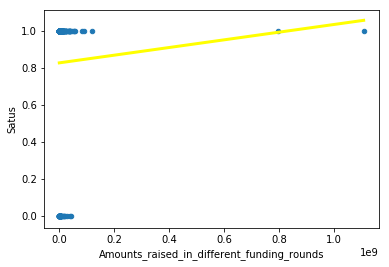

In [291]:
df3.plot(kind = 'scatter', x = 'Amounts_raised_in_different_funding_rounds', y = 'Satus')
plt.plot(xNew, assume,  c='yellow', linewidth=3)

In [292]:
lo = smf.ols(formula = 'Satus ~ YCombinatorYear', data= df3).fit()

lo.params

Intercept         -182.591837
YCombinatorYear      0.091190
dtype: float64

In [293]:
xNew2 = pd.DataFrame({'YCombinatorYear':[df3.YCombinatorYear.min(), df3.YCombinatorYear.max()]})
xNew2.head()


,YCombinatorYear
0,2005
1,2014


In [294]:
assumelo = lo.predict(xNew2)
assumelo

0    0.244408
1    1.065119
dtype: float64

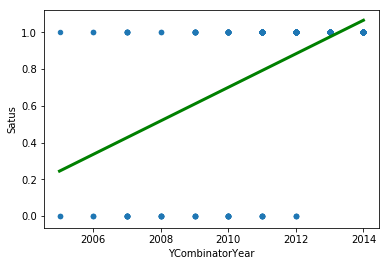

In [295]:
df3.plot(kind = 'scatter', x = 'YCombinatorYear', y = 'Satus')
plt.plot(xNew2, assumelo,  c='green', linewidth=3)